# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid=86414fd3a209d7ef0e634aac06cf6703"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xiaoweizhai
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | chifeng
Processing Record 4 of Set 1 | sardarshahr
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | leh
Processing Record 12 of Set 1 | sivaganga
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | chuguyevka
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | aioun
Processing Record 18 of Set 1 | ban houakhoua
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | quellon
Processing Record 22 o

Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | crane
Processing Record 43 of Set 4 | khorixas
Processing Record 44 of Set 4 | hanawa
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | howard springs
Processing Record 48 of Set 4 | kapit
Processing Record 49 of Set 4 | blenheim
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | lerwick
Processing Record 2 of Set 5 | porto novo
Processing Record 3 of Set 5 | fisterra
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | oranjestad
Processing Record 6 of Set 5 | bonthe
Processing Record 7 of Set 5 | lahat
Processing Record 8 of Set 5 | rafsanjan
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | taltal
Processing Record 11 of Set 5 | griffith
Processing Record 12 of Set 5 | madinat ash shamal
Processing Record 13 of Set 5 | lembar
City not found. Skipping...
Processing Record 14 of Set 5 | p

Processing Record 31 of Set 8 | djidiouia
Processing Record 32 of Set 8 | halifax
Processing Record 33 of Set 8 | nazare
Processing Record 34 of Set 8 | pekan
Processing Record 35 of Set 8 | nova sintra
Processing Record 36 of Set 8 | blythe
Processing Record 37 of Set 8 | stephenville
Processing Record 38 of Set 8 | dourados
Processing Record 39 of Set 8 | altai
Processing Record 40 of Set 8 | pompeu
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | itaituba
Processing Record 43 of Set 8 | shahr-e babak
Processing Record 44 of Set 8 | rikaze
Processing Record 45 of Set 8 | sisimiut
Processing Record 46 of Set 8 | heunghae
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | santana
Processing Record 49 of Set 8 | constitucion
Processing Record 0 of Set 9 | tadine
Processing Record 1 of Set 9 | stiens
Processing Record 2 of Set 9 | abalak
Processing Record 3 of Set 9 | revda
Processing Record 4 of Set 9 | kerman
Processing Record 5 of Se

Processing Record 18 of Set 12 | yakeshi
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | angaur state
Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | kuqa
Processing Record 23 of Set 12 | tidjikja
Processing Record 24 of Set 12 | asosa
Processing Record 25 of Set 12 | daru
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | kibakwe
Processing Record 28 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 29 of Set 12 | murghob
Processing Record 30 of Set 12 | ponta delgada
Processing Record 31 of Set 12 | suozhen
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xiaoweizhai,26.1903,107.5125,278.32,88,100,2.56,CN,1699848179
1,udachny,66.4167,112.4000,261.18,84,100,3.64,RU,1699848104
2,chifeng,42.2683,118.9636,273.84,47,0,3.56,CN,1699848179
3,sardarshahr,28.4333,74.4833,295.24,39,2,2.26,IN,1699848180
4,ushuaia,-54.8000,-68.3000,282.96,53,0,4.12,AR,1699848084


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiaoweizhai,26.1903,107.5125,278.32,88,100,2.56,CN,1699848179
1,udachny,66.4167,112.4000,261.18,84,100,3.64,RU,1699848104
2,chifeng,42.2683,118.9636,273.84,47,0,3.56,CN,1699848179
3,sardarshahr,28.4333,74.4833,295.24,39,2,2.26,IN,1699848180
4,ushuaia,-54.8000,-68.3000,282.96,53,0,4.12,AR,1699848084


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

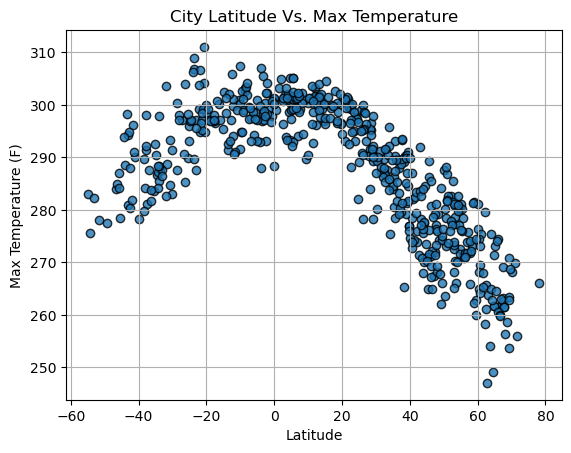

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

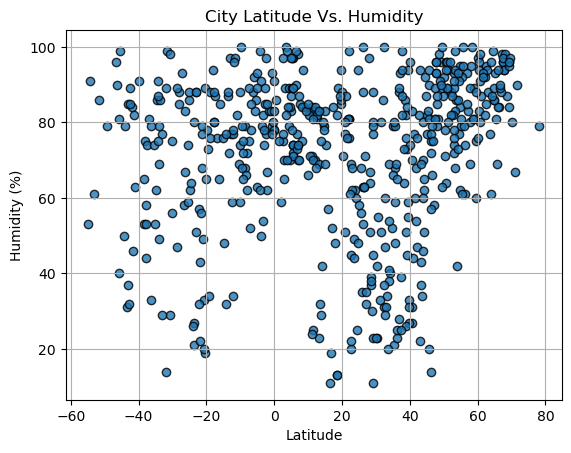

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

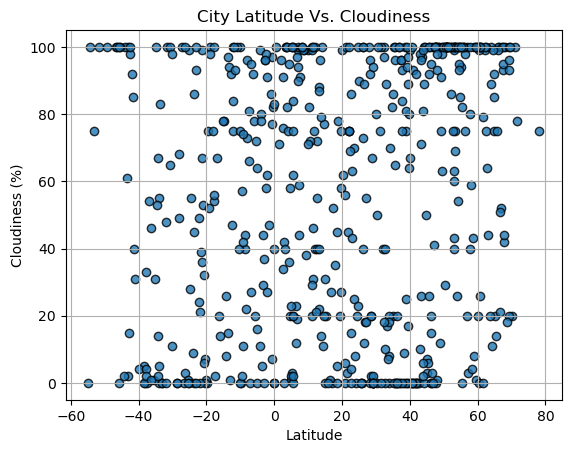

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

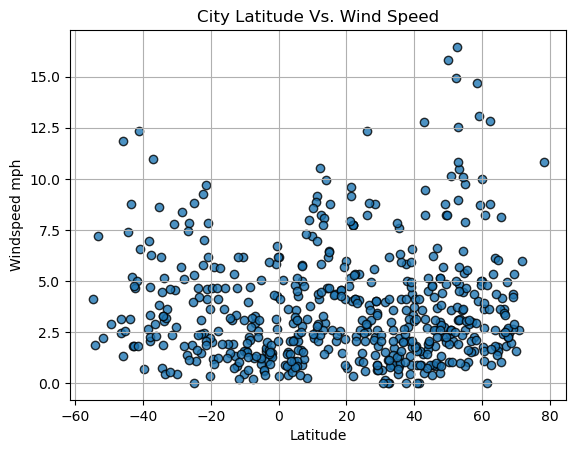

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiaoweizhai,26.1903,107.5125,278.32,88,100,2.56,CN,1699848179
1,udachny,66.4167,112.4000,261.18,84,100,3.64,RU,1699848104
2,chifeng,42.2683,118.9636,273.84,47,0,3.56,CN,1699848179
3,sardarshahr,28.4333,74.4833,295.24,39,2,2.26,IN,1699848180
5,olonkinbyen,70.9221,-8.7187,269.95,67,100,2.57,SJ,1699848088


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ushuaia,-54.8000,-68.3000,282.96,53,0,4.12,AR,1699848084
6,puerto natales,-51.7236,-72.4875,278.09,86,100,2.21,CL,1699847820
7,port-aux-francais,-49.3500,70.2167,277.59,79,100,2.90,TF,1699847788
8,mar del plata,-38.0023,-57.5575,284.19,75,0,2.06,AR,1699847930
9,adamstown,-25.0660,-130.1015,295.94,86,99,8.81,PN,1699847798


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8934587943857653


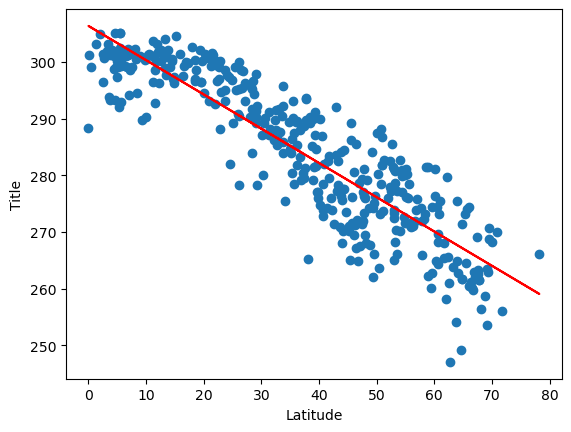

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.6781336311720869


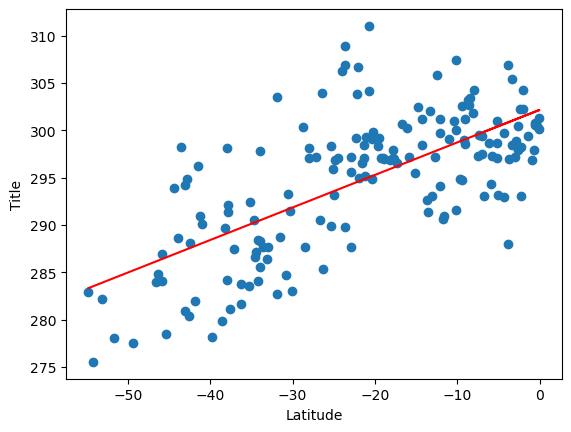

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** These linear regression scatter plots are providing insight into the linear relationship between latitude and maximum temperature in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21453589717806576


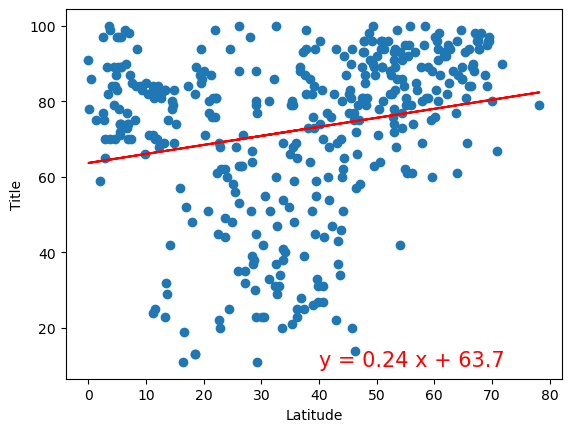

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1740588387623336


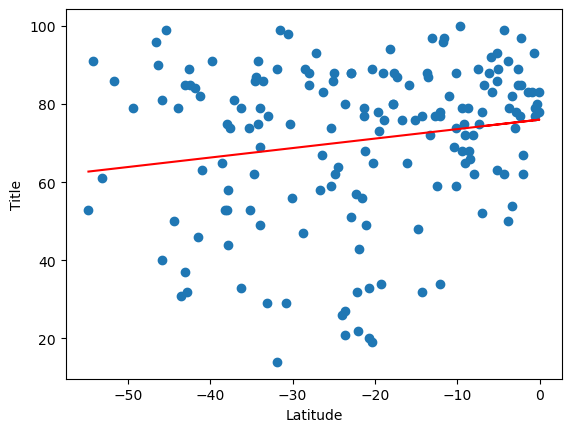

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16890628135123692


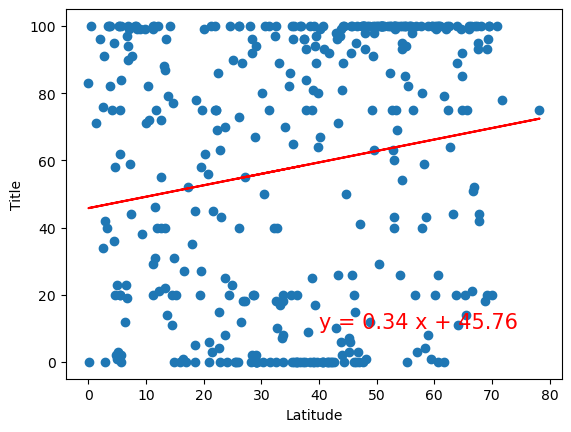

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.05115131679354396


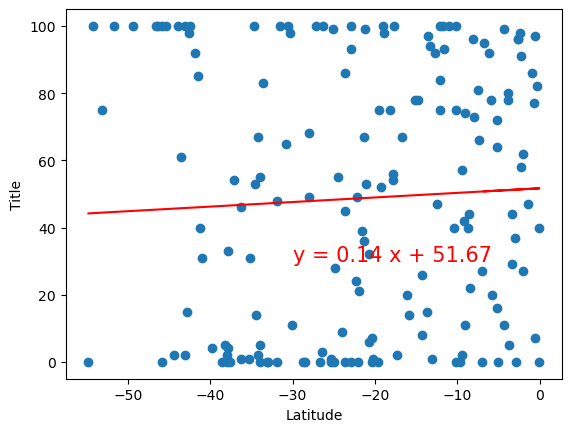

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08567762554537696


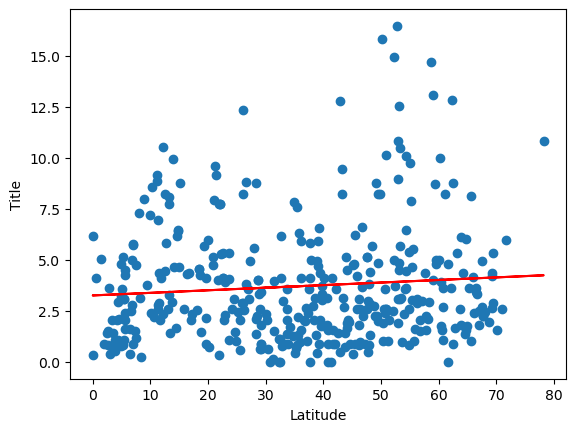

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.2982823301209563


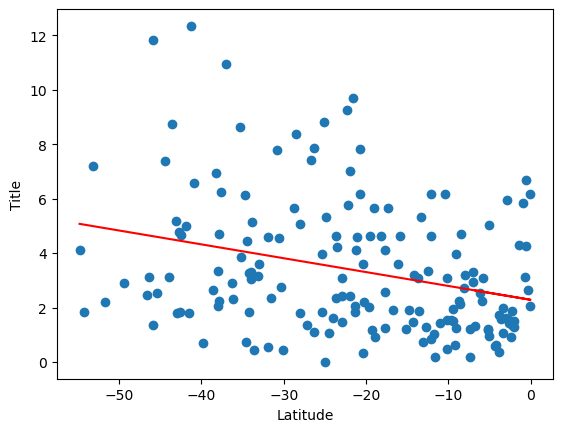

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE